In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [278]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.write_html('first_figure.html', auto_open=True)

In [52]:
from collections import defaultdict

In [210]:
df_train = pd.read_csv('../data/train_users.csv')

In [211]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [312]:
df_test = pd.read_csv('../data/test_users.csv')

In [212]:
len(df_train.date_first_booking.dropna())

88908

In [213]:
len(df_train.loc[df_train.country_destination != 'NDF'])

88908

In [214]:
#df_train = df_train.drop(columns = ['date_first_booking'], axis = 1)

In [215]:
df_train['booked'] = df_train.date_first_booking.notnull()

DatetimeIndex

In [216]:
#df_train['date_account_created'] = pd.to_datetime(date_account_created, format='%Y-%m-%d', errors='ignore')
df_train['account_created_year'] = pd.DatetimeIndex(df_train['date_account_created']).year
df_train['account_created_month'] = pd.DatetimeIndex(df_train['date_account_created']).month
df_train['account_created_day'] = pd.DatetimeIndex(df_train['date_account_created']).day
#df_train = df_train.drop(['date_account_created'], axis = 1)

In [317]:
#df_train['date_account_created'] = pd.to_datetime(date_account_created, format='%Y-%m-%d', errors='ignore')
df_test['account_created_year'] = pd.DatetimeIndex(df_test['date_account_created']).year
df_test['account_created_month'] = pd.DatetimeIndex(df_test['date_account_created']).month
df_test['account_created_day'] = pd.DatetimeIndex(df_test['date_account_created']).day
#df_train = df_train.drop(['date_account_created'], axis = 1)

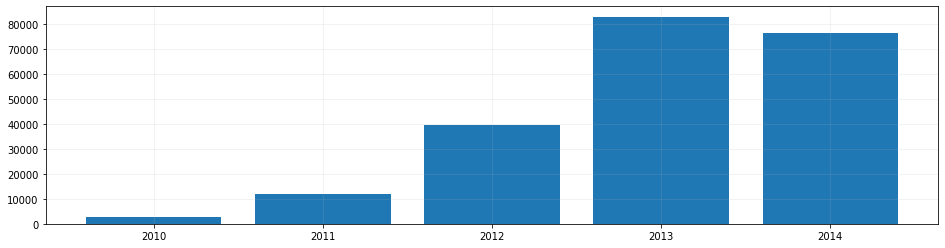

In [294]:
y = df_train.groupby('account_created_year').size()
x = y.index

plt.figure(figsize=(16,4))
plt.bar(x, y)
plt.grid(alpha = 0.2)
plt.show()

In [296]:
import plotly.express as px
year_data = px.data.gapminder().query("country == 'year'")
fig = px.bar(pd.DataFrame(df_train.groupby('account_created_year').size()).reset_index(), x = 'account_created_year', y = 0)
fig.show()

df.groupby().size()

In [218]:
year_month = df_train.groupby(['account_created_year', 'account_created_month']).size()

In [219]:
from collections import defaultdict

defaultdict(lambda :) -> lambda 작성하는 법

In [220]:
account_year_month = defaultdict(lambda: [-1 for x in range(13)])
for idx, val in zip(year_month.index, year_month):
    year = idx[0]
    month = idx[1]
    account_year_month[year][month] = val

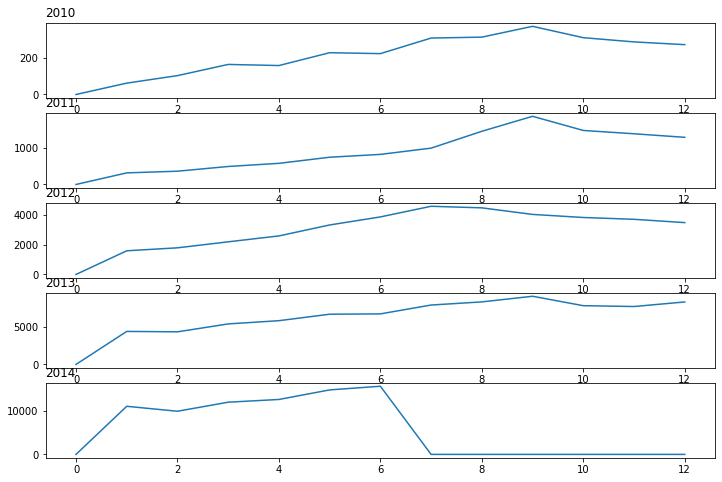

In [221]:
fig, axes = plt.subplots(len(account_year_month.keys()), 1)

for year, ax in zip(account_year_month.keys(), axes):
    
    vals = account_year_month[year]
    start = next(x for x, val in enumerate(vals) if val != -1)
    end = next(x for x, val in enumerate(vals[::-1]) if val != -1)
    
    start = start if start != 0 else 1
    end = end if end != 0 else 13

    ax.plot([m for m in range(len(vals))], vals)
    ax.set_title(year, loc = 'left')

In [222]:
def draw_line_plot(data):
    
    for year in data.keys():
        start = next(x for x, val in enumerate(data[year]) if val != -1)
        end = next(x for x, val in enumerate(data[year][::-1]) if val != -1)

        start = start if start != 0 else 1
        end = end if end != 0 else 13
        
        plt.plot([x for x in range(start, end)], data[year][start:end], label = year)
    
    plt.xticks([x for x in range(start, end)])

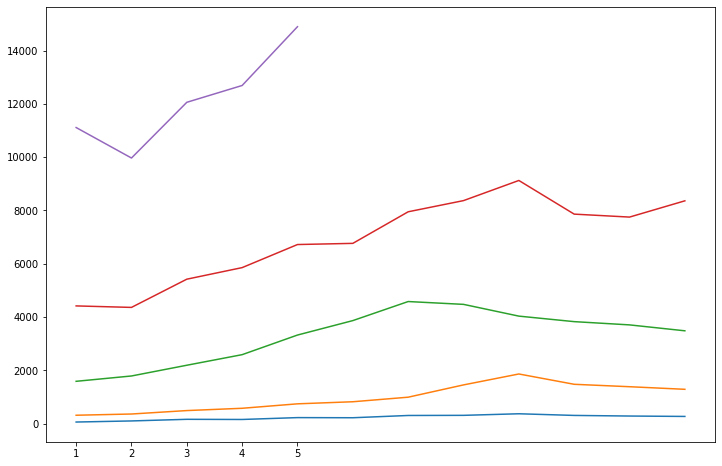

In [223]:
draw_line_plot(account_year_month)

In [224]:
activation = pd.DataFrame(df_train.groupby(['account_created_year', 'account_created_month']).size())
activation = activation.rename(columns = {0:'number_of_users'})

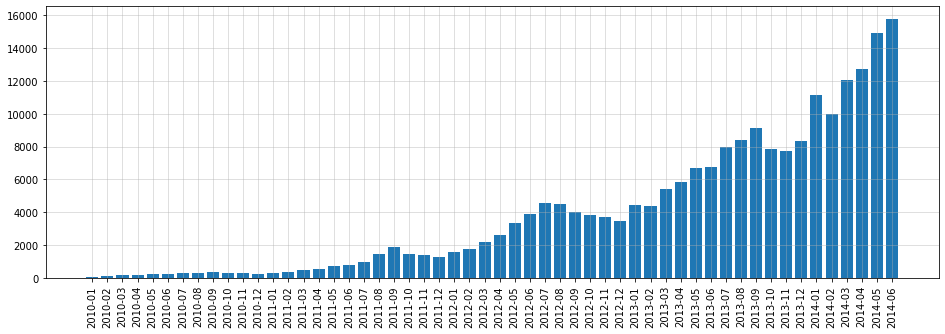

In [225]:
plt.figure(figsize=(16, 5))  
x = ['{}-{:02}'.format(y, m) for (y, m) in activation.index]
y = activation['number_of_users']
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.grid(alpha = 0.5)
plt.show()

In [18]:
df_train.affiliate_channel.unique()

array(['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

In [19]:
affi_channel_month = df_train.groupby(['account_created_year', 'account_created_month','affiliate_channel']).size().unstack()
affi_channel_month = affi_channel_month.fillna(0)

In [20]:
month_range = ['{}-{:02}'.format(y, m) for (y, m) in affi_channel_month.index]

In [21]:
channel_count = defaultdict(list)
for channel in affi_channel_month.columns:
    for m in range(len(affi_channel_month[channel])):
        count = affi_channel_month[channel][m]
        channel_count[channel].append(count) 

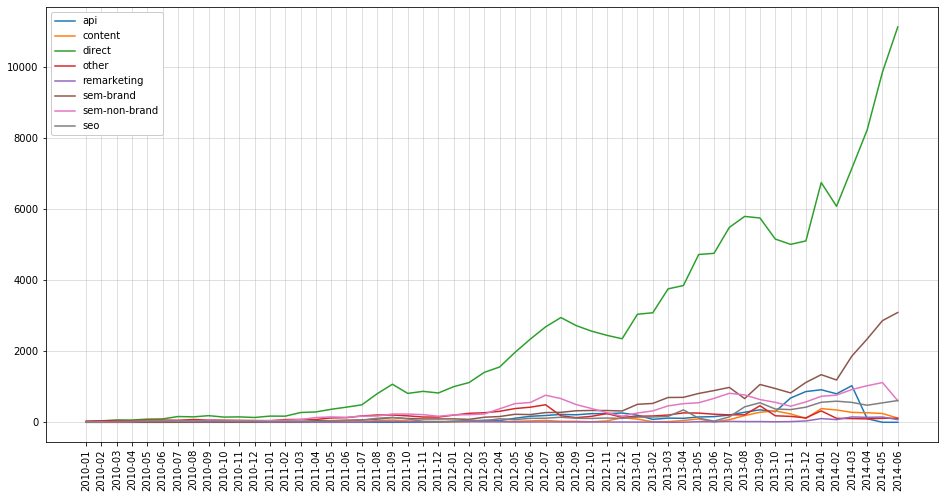

In [62]:
plt.figure(figsize=(16,8))
for channel in channel_count.keys():
    plt.plot(month_range, channel_count[channel], label = channel)
plt.xticks(rotation = 90)
plt.legend(framealpha=1, frameon=True);
plt.grid(alpha=0.5)
plt.show()

In [23]:
count_by_month = pd.DataFrame.from_dict(channel_count, orient = 'index', columns = x)

In [24]:
add = pd.DataFrame([])
for idx in range(1, len(x)):
    previous = month_range[idx - 1]
    current = month_range[idx]
    add = pd.concat([add, pd.DataFrame(count_by_month[current] / count_by_month[previous], columns = [current])], axis = 1)

In [25]:
def color_negative_red(value):
    """
    Colors elements in a dateframe
    green if positive and red if
    negative. Does not color NaN
    values.
    """
    
    if value == 0:
        color = 'black'
    elif value >= 1:
        color = 'red'
    else:
        color = 'blue'
    return 'color: %s'%color

In [26]:
add.replace(np.inf, np.nan).round(2).fillna(0).style.applymap(color_negative_red)

,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06
api,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0.8,2.42,0.83,2.35,1.5,1.13,1.16,0.95,1.15,1,1.07,0.76,0.41,1.43,0.96,1.33,1.07,1.29,1.38,1.24,0.85,2.28,1.27,1.06,0.88,1.28,0.1,0,0
content,0,11,1,0.82,0.67,1.5,1,0.67,2.5,0.67,0.8,2.38,0.95,0.83,0.67,1.6,1.06,1.18,2.3,1.37,0.62,0.44,0.94,0.69,2,1.41,0.58,1.5,1.44,1.33,0.52,1,0.48,3,3.23,0.71,0.17,1.2,2.83,1.84,0.1,8.11,2.58,1.5,1.13,0.74,0.45,3.6,0.9,0.8,0.96,0.92,0.47
direct,1.78,1.56,1,1.39,1.07,1.71,0.94,1.22,0.78,1.04,0.89,1.29,0.99,1.6,1.06,1.26,1.16,1.15,1.64,1.33,0.76,1.07,0.95,1.22,1.11,1.26,1.11,1.26,1.19,1.15,1.1,0.92,0.94,0.95,0.96,1.29,1.01,1.22,1.03,1.23,1.01,1.15,1.06,0.99,0.9,0.97,1.02,1.32,0.9,1.18,1.15,1.2,1.13
other,1.25,1.23,0.86,1.45,1.02,0.92,1.35,0.87,0.88,0.92,0.93,0.86,1.79,1.04,0.98,1.56,1.07,1.37,1.15,1,0.88,0.82,0.99,1.38,1.25,1.06,1.15,1.25,1.1,1.16,0.37,0.71,1.28,1.47,0.57,1.21,1.04,1.15,1.3,0.98,0.88,0.92,1,2.22,0.39,0.91,0.75,2.57,0.35,0.94,0.92,1.17,1
remarketing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.4,1.09,0.58,1,1,1.21,1.06,0.67,1.33,0.38,1.5,1.11,0.7,1.43,1,0.7,1,0.86,0.83,0,0,8.5,0.82,1.86,0.77,1,0.7,1.43,1.85,2.81,0.72,2.01,0.92,1.06,0.51
sem-brand,0,0,0,0,0,0,5,2.2,0.55,0.83,1.8,1.67,1.07,1.31,2.05,1.02,1.25,1.22,1.33,1.48,0.81,0.88,1,1.02,0.85,1.73,1.14,1.39,0.96,1.26,1.03,1.16,1.03,0.99,0.96,1.59,1.05,1.31,1.01,1.16,1.1,1.1,0.68,1.6,0.89,0.87,1.36,1.19,0.89,1.56,1.26,1.22,1.08
sem-non-brand,7,1.21,1.35,1.48,1,1.18,0.8,2.12,0.74,0.8,1.02,1.2,1.12,1.36,1.79,1.13,0.93,1.23,1.02,1.32,1,0.93,0.79,1.22,1.03,1.09,1.63,1.38,1.06,1.37,0.88,0.75,0.78,0.7,0.63,1.53,1.23,1.44,1.13,1.05,1.22,1.21,0.94,0.83,0.88,0.81,1.26,1.28,1.05,1.21,1.12,1.09,0.54
seo,1.5,3.67,0.77,2,0.74,1.52,0.95,0.92,1,0.76,1.12,0.57,1.5,1.04,0.8,2.25,1.2,1.11,1.88,1.21,0.67,0.29,0.85,1,2.57,0.71,2.36,0.77,1.46,1.04,1.23,0.8,0.96,1.11,0.92,1.32,1.03,1.11,2.1,0.33,0.28,4.61,2.86,1.26,0.68,0.95,1.19,1.33,1.05,0.94,0.86,1.14,1.12


Which of these channels are bringing you most conversions?

In [160]:
conversion_rate = df_train.groupby(['affiliate_channel', 'booked']).size() / df_train.groupby(['affiliate_channel']).size()

In [175]:
conversion_rate.unstack().sort_values(by = True, ascending = False)

booked,False,True
affiliate_channel,,
seo,0.543461,0.456539
direct,0.568727,0.431273
sem-brand,0.574045,0.425955
other,0.598259,0.401741
sem-non-brand,0.620569,0.379431
api,0.658994,0.341006
remarketing,0.664234,0.335766
content,0.858663,0.141337


In [66]:
y = df_train.age.dropna().value_counts()
x = y.index

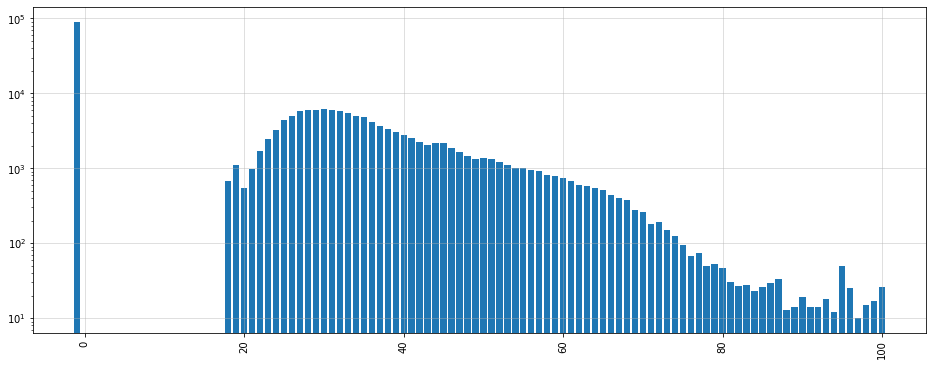

In [67]:
plt.figure(figsize=(16,6))
plt.bar(x, y)
plt.grid(alpha = 0.5)
plt.xticks(rotation = 90)
plt.yscale("log")

use of loc

In [68]:
age_mask = df_train.age > 1000
df_train.loc[age_mask, 'age'] = 2015 - df_train.loc[age_mask, 'age']

In [69]:
df_train.loc[(df_train.age > 100) | (df_train.age < 18), 'age'] = -1
df_train.age.fillna(-1, inplace = True)

In [70]:
y = df_train.loc[df_train.age != -1, 'age'].value_counts()
x = y.index

<BarContainer object of 83 artists>

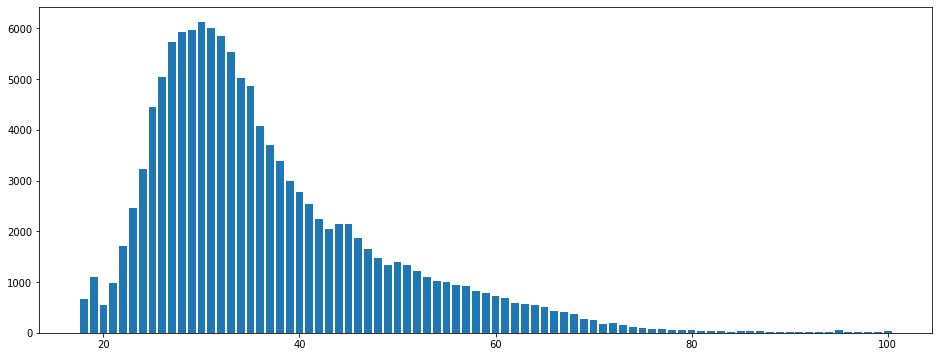

In [72]:
plt.figure(figsize=(16,6))
plt.bar(x, y)

In [73]:
gender_destination = pd.crosstab(df_train.gender, df_train.country_destination, normalize = True)
gender_destination['SUM'] = gender_destination.agg(np.sum, axis = 1)
gender_destination.loc['SUM'] = gender_destination.sum()
gender_destination

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other,SUM
gender,,,,,,,,,,,,,
-unknown-,0.000670,0.002300,0.001331,0.003350,0.008025,0.003551,0.004872,0.312343,0.001063,0.000323,0.094209,0.016252,0.448290
FEMALE,0.000970,0.002132,0.001677,0.003996,0.009192,0.004127,0.005111,0.145457,0.001190,0.000365,0.106319,0.014804,0.295342
MALE,0.000881,0.002235,0.001949,0.003172,0.006254,0.003195,0.003275,0.125176,0.001302,0.000323,0.091154,0.016130,0.255047
OTHER,0.000005,0.000023,0.000014,0.000019,0.000061,0.000014,0.000023,0.000497,0.000014,0.000005,0.000543,0.000103,0.001321
SUM,0.002525,0.006690,0.004971,0.010536,0.023532,0.010888,0.013282,0.583473,0.003570,0.001017,0.292226,0.047290,1.000000


In [74]:
destination_by_gender = pd.DataFrame([])
for gender in df_train.gender.unique():
    gender_mask = df_train.gender == gender
    destination_by_gender = destination_by_gender.append(df_train.loc[gender_mask, 'country_destination'].value_counts(normalize = True).rename(gender))
destination_by_gender['SUM'] = destination_by_gender.agg(np.sum, axis = 1)

In [75]:
destination_by_gender

,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other,SUM
-unknown-,0.001494,0.005131,0.002968,0.007472,0.017902,0.007922,0.010869,0.696744,0.002372,0.000721,0.210152,0.036253,1.0
MALE,0.003453,0.008762,0.007641,0.012436,0.024522,0.012528,0.012840,0.490797,0.005107,0.001267,0.357403,0.063244,1.0
FEMALE,0.003284,0.007218,0.005679,0.013531,0.031123,0.013975,0.017306,0.492505,0.004029,0.001237,0.359988,0.050126,1.0
OTHER,0.003546,0.017730,0.010638,0.014184,0.046099,0.010638,0.017730,0.375887,0.010638,0.003546,0.411348,0.078014,1.0


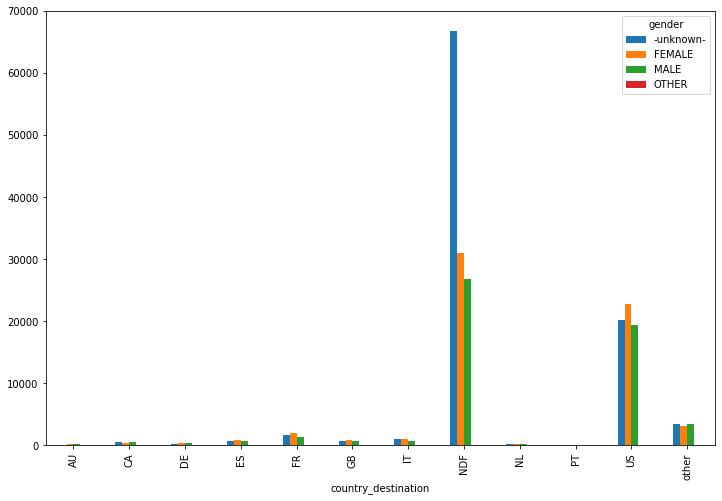

In [78]:
pd.crosstab(df_train['country_destination'], df_train['gender']).plot.bar()

In [79]:
gender_country = defaultdict(list)
for gender in df_train.gender.unique():
    gender_country[gender] = df_train.loc[df_train.gender == gender, 'country_destination'].value_counts()

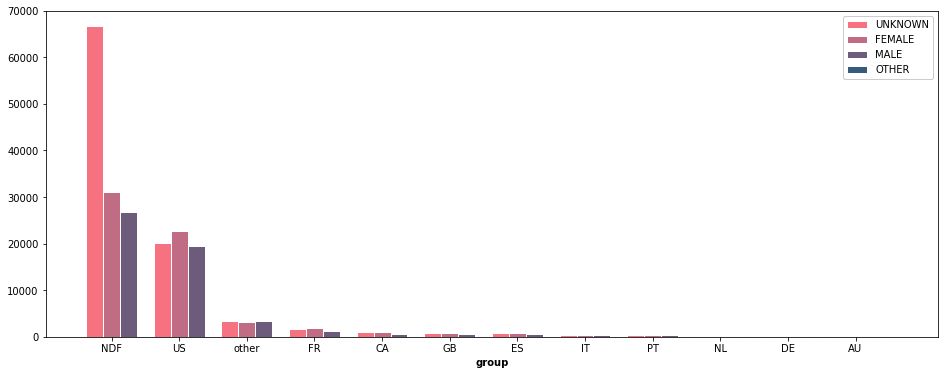

In [81]:
barWidth = 0.25

colors = ['#0F4C81', '#F5B895', '#77202F', '#E38690']

plt.figure(figsize=(16,6))

r1 = np.arange(len(gender_country['-unknown-']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, gender_country['-unknown-'], color='#F67280', width=barWidth, edgecolor='white', label='UNKNOWN')
plt.bar(r2, gender_country['FEMALE'], color='#C06C84', width=barWidth, edgecolor='white', label='FEMALE')
plt.bar(r3, gender_country['MALE'], color='#6C5B7B', width=barWidth, edgecolor='white', label='MALE')
plt.bar(r4, gender_country['OTHER'] , color='#355C7D', width=barWidth, edgecolor='white', label='OTHER')

plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(gender_country['FEMALE']))], df_train.country_destination.unique())
plt.legend(framealpha=1, frameon=True);
plt.show()

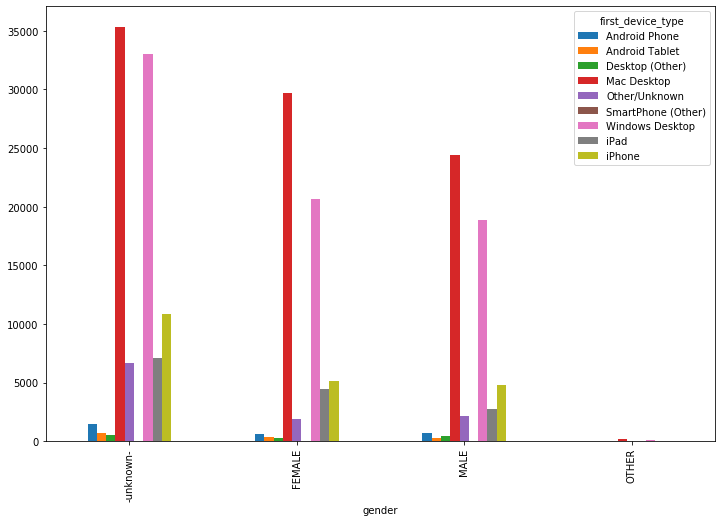

In [82]:
pd.crosstab(df_train.gender, df_train.first_device_type).plot.bar()

In [83]:
#gender_mask = (df_train.gender == '-unknown-')
age_mask = (df_train.age != -1)

In [84]:
df_train.loc[age_mask, 'gender'].value_counts()

FEMALE       56695
MALE         49949
-unknown-    16119
OTHER          224
Name: gender, dtype: int64

In [85]:
age_mask = (df_train.age == -1)
df_train.loc[age_mask, 'gender'].value_counts()

-unknown-    79569
FEMALE        6346
MALE          4491
OTHER           58
Name: gender, dtype: int64

In [86]:
dates = df_train.loc[df_train.date_first_booking.notnull()]
_delta = (pd.DatetimeIndex(dates['date_first_booking']) - pd.DatetimeIndex(dates['date_account_created'])).days
_delta = [day for day in _delta if day >= 0]

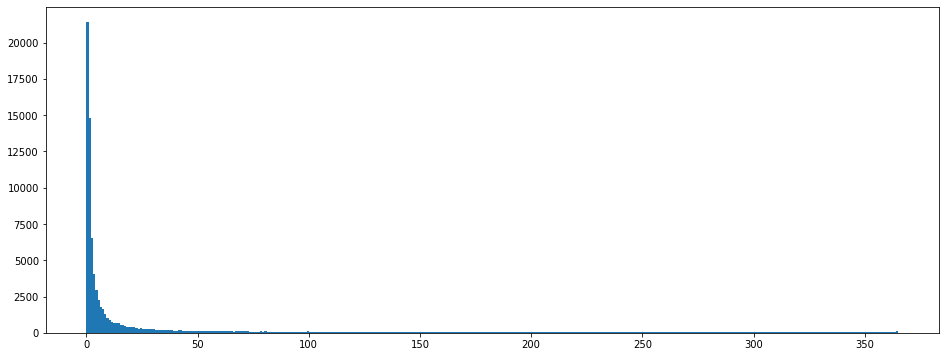

In [88]:
plt.figure(figsize=(16,6))
plt.hist(_delta, bins = 365)
plt.show()

Session Data

In [408]:
sessions = pd.read_csv('../data/sessions.csv')

In [409]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [410]:
sum(sessions.secs_elapsed.isnull())

136031

In [411]:
sessions['secs_elapsed'] = sessions['secs_elapsed'].fillna(0)

In [413]:
sum(sessions.secs_elapsed.isnull())

0

In [90]:
sessions.head(4)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0


In [417]:
sessions = sessions.rename(columns = {'user_id':'id'})

In [418]:
sessions.head(4)

,id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0


In [93]:
booked_users_id = df_train.loc[pd.notnull(df_train.date_first_booking), 'id']

In [94]:
booked_users = sessions.loc[sessions.id.isin(booked_users_id)]
unbooked_users = sessions.loc[~sessions.id.isin(booked_users_id)]

In [100]:
mask = df_train.date_account_created > df_train.date_first_booking
book_first = df_train.loc[(df_train.id.isin(booked_users_id)) & mask].id
sessions.loc[sessions.id.isin(book_first)]

,id,action,action_type,action_detail,device_type,secs_elapsed


In [101]:
len(book_first)

29

In [102]:
last_day_ids = df_train.loc[df_train.date_account_created == '2014-06-30'].id
sessions.loc[sessions.id.isin(last_day_ids)].groupby('id')['secs_elapsed'].agg(np.sum).max()/60/60/24

126.49166666666667

In [114]:
booked_users_elapsed = booked_users.groupby('id')['secs_elapsed'].agg(['sum', ('day', lambda x: np.sum(x)/60/60/24)])
unbooked_users_elapsed = unbooked_users.groupby('id')['secs_elapsed'].agg(['sum', ('day', lambda x: np.sum(x)/60/60/24)])

In [115]:
_booked = []
_unbooked = []
for day in range(0, 121):
    _booked.append(1 - (len(booked_users_elapsed.loc[booked_users_elapsed.day < day]) / len(booked_users_elapsed)))
    _unbooked.append(1 - (len(unbooked_users_elapsed.loc[unbooked_users_elapsed.day < day]) / len(unbooked_users_elapsed)))

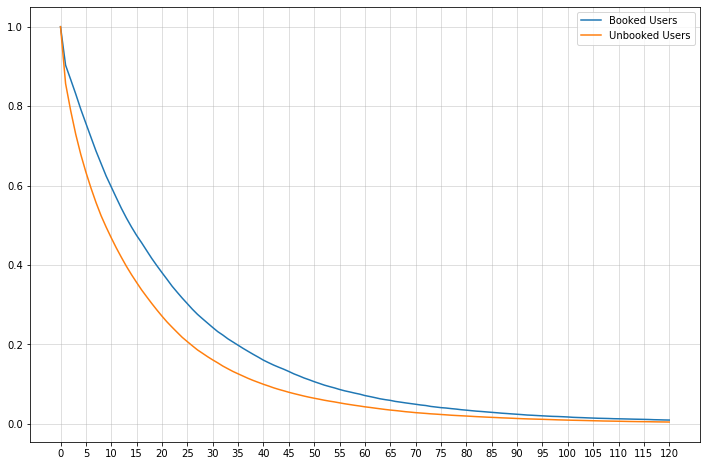

In [116]:
plt.plot(range(0, 121), _booked, label = 'Booked Users')
plt.plot(range(0, 121), _unbooked, label = 'Unbooked Users')
plt.legend()
plt.xticks(range(0,121, 5))
plt.grid(alpha = 0.5)

In [414]:
sessions.action_type.value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [419]:
action_count = sessions.groupby(['id', 'action'])['action_type'].agg('count')

In [420]:
action_count.unstack().loc[action_count.unstack()['confirm_email'] > 1]['confirm_email'].mean()

2.4192238267148016

In [421]:
action_count.unstack().loc[action_count.unstack()['confirm_email'] > 1]['confirm_email'].max()

18.0

MAU (Monthly Active Users)

In [422]:
sessions_ids = sessions.id.unique()

In [423]:
from_train = df_train.loc[df_train.id.isin(sessions_ids), ['id', 'date_account_created']]
from_test = df_test.loc[df_test.id.isin(sessions_ids), ['id', 'date_account_created']]
account_created_date = pd.concat([from_train, from_test], axis = 0)

In [425]:
sessions['cumulate_secs'] = sessions.groupby('id')['secs_elapsed'].cumsum()
sessions['cumulate_days'] = sessions['cumulate_secs']/60/60//24

In [491]:
date_dict = defaultdict()
for row in df_train.loc[:, ['id','date_account_created']]:
    date_dict[row['id']] = row['date_account_created']

TypeError: string indices must be integers

In [485]:
def return_session_date(row):
    _id = row['id']
    _delta = row['cumulate_days']
    return _date + pd.DateOffset(_delta)

SyntaxError: invalid syntax (<ipython-input-485-7d5a0403622d>, line 5)

In [484]:
sessions.loc[:4, ['id', 'cumulate_days']].apply(return_session_date, axis = 1)

0    DatetimeIndex(['2014-01-01'], dtype='datetime6...
1    DatetimeIndex(['2014-01-01'], dtype='datetime6...
2    DatetimeIndex(['2014-01-01'], dtype='datetime6...
3    DatetimeIndex(['2014-01-02'], dtype='datetime6...
4    DatetimeIndex(['2014-01-02'], dtype='datetime6...
dtype: object